In [1]:
pip install --upgrade google-cloud-language


The following command must be run outside of the IPython shell:

    $ pip install --upgrade google-cloud-language

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
from google.cloud import language_v1
from google.cloud.language_v1 import enums
from google.api_core.exceptions import InvalidArgument
import six
import os
import pandas as pd
import datetime
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/Emily/Desktop/Project-3c9dda9efd10.json'


In [3]:
def analyze_sentiment(content):

    client = language_v1.LanguageServiceClient()
    # content = 'Your text to analyze, e.g. Hello, world!'

    if isinstance(content, six.binary_type):
        content = content.decode('utf-8')

    type_ = enums.Document.Type.PLAIN_TEXT
    document = {'type': type_, 'content': content}

    try:
    # smallest block of code you foresee an error in
        response = client.analyze_sentiment(document)
        sentiment = response.document_sentiment # I think your exception is being raised in this call
        return sentiment.score, sentiment.magnitude
    except InvalidArgument as e:
    # your trace shows InvalidArgument being raised and it appears you dont care about it
        pass # continue to next iteration since this error is expected
    except TypeError as e:
    # this is an example exception that is also OK and "skippable"
        pass # continue to next iteration
    except Exception as e:
    # all other exceptions are BAD and unexpected.This is a larger problem than just this loop
        raise e # break the looping and raise to calling function
    
def sentiment_columns(series):
    '''Takes a pandas series and performs GCL sentiment analysis, returning the columns for sentiment score and magnitude, respectively, in a tuple'''  
    try: 
        series = series.apply(analyze_sentiment)
        return series.apply(lambda x: x[0]), series.apply(lambda x:x[1])
    except TypeError as e:
    # your trace shows TypeError being raised and it appears you dont care about it
        pass # continue to next ite

In [28]:
df = pd.read_csv('/Users/Emily/Documents/github/soup4lyfe/news/BTC.csv')
df = df.drop('Unnamed: 0', axis = 1)
df = df.head(25)
df['published_on'] = pd.to_datetime(df['published_on'])
df['date'] = df['published_on'].apply(lambda x: x.date())
grouped=df.groupby('date')
#df['body_sentiment'], df['body_magnitude'] = sentiment_columns(df.body)
df['title_sentiment'], df['title_magnitude'] = sentiment_columns(df.title)
new_df=pd.DataFrame(grouped['title_sentiment'].mean())
#aggregate_body_magnitude=grouped['body_magnitude'].mean()
#aggregate_title_sentiment=grouped['title_sentiment'].mean()
aggregate_title_magnitude=grouped['title_magnitude'].mean()
new_df.join([aggregate_title_magnitude])
new_df

ValueError: too many values to unpack (expected 2)

<h1> VADER SENTIMENT </h1>

In [2]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download()
from nltk import sent_tokenize, word_tokenize



showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
def vader_comparison(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    analyzer = SentimentIntensityAnalyzer()
    sentences = sent_tokenize(texts)
    pos=compound=neu=neg=0 #set the initial scores for every sentence to 0
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos+=vs['pos']/(len(sentences)) 
        compound+=vs['compound']/(len(sentences))
        neu+=vs['neu']/(len(sentences))
        neg+=vs['neg']/(len(sentences))
    return pos, neg, neu, compound

In [4]:
def sentiment_columns(series):
    try: 
        series = series.apply(vader_comparison)
        return series.apply(lambda x: x[0]), series.apply(lambda x:x[1]),series.apply(lambda x: x[2]),series.apply(lambda x: x[3])
    except TypeError as e:
    # your trace shows TypeError being raised and it appears you dont care about it
        pass # continue to next iteration

In [7]:
import pandas as pd
df = pd.read_csv('/Users/Emily/Documents/github/soup4lyfe/news/BTC.csv')
df = df.drop('Unnamed: 0', axis = 1)
df=df.head(100)
df['bdy_sent_pos'],df['bdy_sent_neg'],df['bdy_sent_neu'],df['bdy_sent_compound'] = sentiment_columns(df.body)
df['title_sent_pos'],df['title_sent_neg'],df['title_sent_neu'],df['title_sent_compound'] =sentiment_columns(df.title)
df['published_on'] = pd.to_datetime(df['published_on'])
df['date'] = df['published_on'].apply(lambda x: x.date())
grouped=df.groupby('date')
result=grouped.mean()
result.to_csv('/Users/Emily/Documents/github/soup4lyfe/news/sentiment_results.csv')



,Unnamed: 0.1,body,published_on,source,tags,title,bdy_sent_pos,bdy_sent_neg,bdy_sent_neu,bdy_sent_compound,title_sent_pos,title_sent_neg,title_sent_neu,title_sent_compound,date
0,0,An unconfirmed report ...,2018-11-27 17:45:32,bitcoinmagazine,Bitcoin|Investing,NASDAQ Reportedly Looking Into Bitcoin Futures...,0.068667,0.048333,0.882667,0.337967,0.000,0.000,1.000,0.0000,2018-11-27
1,1,Paraguay&#8217;s vice president has declared s...,2018-11-27 17:40:35,bitcoin.com,Mining|blockchain technology foundation|common...,Paraguay to Provide Land for ‘Golden Goose’ Mi...,0.063667,0.000000,0.936333,0.254367,0.000,0.000,1.000,0.0000,2018-11-27
2,2,Bitcoin couldn’t have asked for more of a beat...,2018-11-27 17:29:03,blokt,News|Bitcoin,"BTC Has Plunged Over 80% From Its Highs, but T...",0.146333,0.072333,0.781000,0.292300,0.171,0.137,0.693,0.2242,2018-11-27
3,3,With the crypto market bubble bursting before ...,2018-11-27 17:17:10,cryptoinsider,Cryptocurrency|Tezos|Baking|Profit,Op-ed: Tezos well-positioned despite crypto be...,0.089667,0.047000,0.863333,0.050733,0.000,0.000,1.000,0.0000,2018-11-27
4,4,Today the world’s most popular Peer-to-Peer co...,2018-11-27 17:17:02,blokt,News,"BitTorrent Now Accepts TRON [TRX], Binance Coi...",0.099667,0.000000,0.900333,0.476967,0.272,0.000,0.728,0.6808,2018-11-27
5,5,Bahrain is the latest country to embrace the b...,2018-11-27 17:00:42,livebitcoinnews,Blockchain Technology|Industry and Adoption|Ne...,Bahrain to Open Doors to Its Blockchain Academ...,0.157750,0.020250,0.822000,0.307500,0.000,0.000,1.000,0.0000,2018-11-27
6,6,A Pakistani-American woman is facing up to 20 ...,2018-11-27 17:00:41,newsbtc,Bitcoin|Crypto|bitcoin|isis|terrorism|terrorists,American Woman Faces 20-Year Sentence for Usin...,0.052500,0.159000,0.788000,-0.361100,0.115,0.000,0.885,0.0772,2018-11-27
7,7,Bitcoin mining has frequently been accused of ...,2018-11-27 16:59:31,blokt,News|Bitcoin|Mining,Bitcoin Power Usage Crybabies Should Turn Off ...,0.000000,0.179667,0.820333,-0.428200,0.000,0.000,1.000,0.0000,2018-11-27
8,8,Tech billionaire Tim Draper is unfazed by the ...,2018-11-27 16:59:22,ccn,Bitcoin Opinion|News|tim draper|Venture Capita...,Billionaire Tim Draper Unfazed By Bitcoin Cras...,0.090667,0.065000,0.844000,0.048633,0.145,0.157,0.698,-0.0516,2018-11-27
9,9,Mexican startup Airtm ...,2018-11-27 16:29:16,bitcoinmagazine,Bitcoin|Adoption & community|Digital assets,Mexican Startup Wants to Support Venezuelans W...,0.067500,0.013167,0.919333,0.245233,0.213,0.000,0.787,0.4019,2018-11-27


<class 'pandas.core.series.Series'>


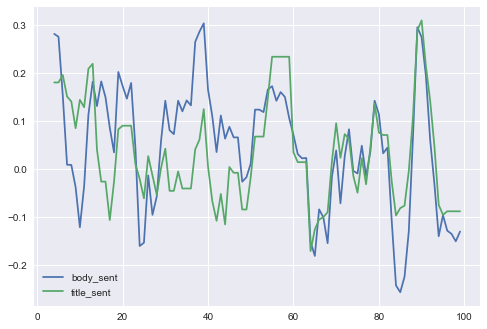

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
rolling_body_compound=df['bdy_sent_compound'].rolling(5).mean()
rolling_title_compound=df['title_sent_compound'].rolling(5).mean()
print(type(df.date))
results=pd.DataFrame({ 'date': df.date, 'body_sent': rolling_body_compound, 'title_sent':rolling_title_compound})
results.set_index('date')
results.plot()